In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Explore fitnesses across generations

In [6]:
df_fitness = pd.read_csv("results/best_fitnesses.csv", header=None)
# drop last column of NaNs
df_fitness = df_fitness.drop(df_fitness.columns[len(df_fitness.columns)-1], axis=1)
# Add column names
columns = ["parallel_strategy"]
columns.extend(["gen_" + str(i) for i in range(0, 50)])
df_fitness.columns = columns


df_fitness.head()

,parallel_strategy,gen_0,gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7,gen_8,...,gen_40,gen_41,gen_42,gen_43,gen_44,gen_45,gen_46,gen_47,gen_48,gen_49
0,sequential,4.442210e-07,4.508980e-07,4.587490e-07,4.639360e-07,4.679990e-07,4.737730e-07,4.792330e-07,4.816360e-07,4.836030e-07,...,5.358720e-07,5.365570e-07,5.367720e-07,5.398130e-07,5.350470e-07,5.375590e-07,5.344850e-07,5.387140e-07,5.368140e-07,5.382590e-07
1,threads1,4.425820e-07,4.517740e-07,4.552030e-07,4.647310e-07,4.706930e-07,4.732260e-07,4.772190e-07,4.801170e-07,4.832850e-07,...,5.329890e-07,5.327450e-07,5.321260e-07,5.410650e-07,5.386140e-07,5.388350e-07,5.373920e-07,5.408700e-07,5.447710e-07,5.447110e-07
2,fastflow1,4.454960e-07,4.527820e-07,4.588510e-07,4.640420e-07,4.704020e-07,4.754450e-07,4.752120e-07,4.796550e-07,4.801670e-07,...,5.459430e-07,5.426280e-07,5.474550e-07,5.423310e-07,5.410750e-07,5.445240e-07,5.414400e-07,5.418850e-07,5.397840e-07,5.416390e-07
3,threads2,4.445310e-07,4.552000e-07,4.619590e-07,4.674690e-07,4.697110e-07,4.715800e-07,4.716220e-07,4.776870e-07,4.832400e-07,...,5.369590e-07,5.352780e-07,5.342490e-07,5.320820e-07,5.315430e-07,5.382880e-07,5.371640e-07,5.350440e-07,5.349700e-07,5.365920e-07
4,fastflow2,4.522800e-07,4.557030e-07,4.610660e-07,4.680490e-07,4.694420e-07,4.759900e-07,4.822850e-07,4.828030e-07,4.885440e-07,...,5.354810e-07,5.353110e-07,5.346800e-07,5.374860e-07,5.391350e-07,5.423880e-07,5.439860e-07,5.478940e-07,5.440410e-07,5.467950e-07


Plot of fitness across generation for Sequential strategy.

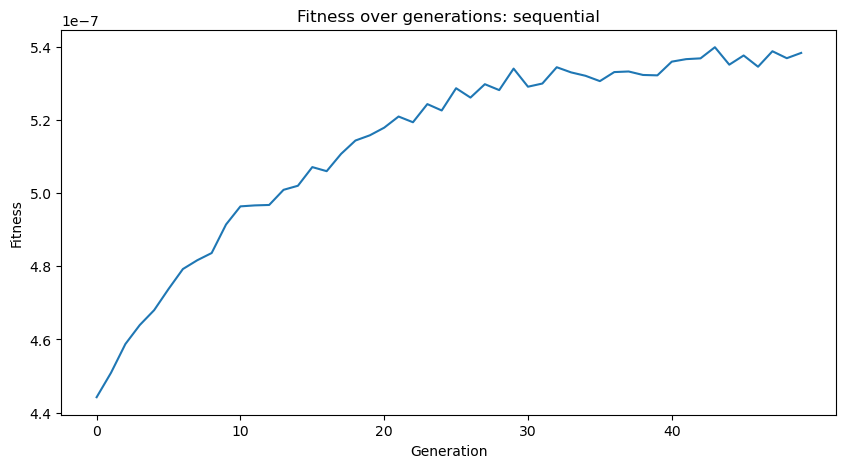

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(df_fitness.iloc[0, 1:])
plt.title('Fitness over generations: ' + df_fitness.iloc[0, 0])
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.xticks(ticks=np.arange(0, 50, 10), labels=np.arange(0, 50, 10))
plt.show()


Plot of fitness across generation for Fastflow (32 workers) strategy.

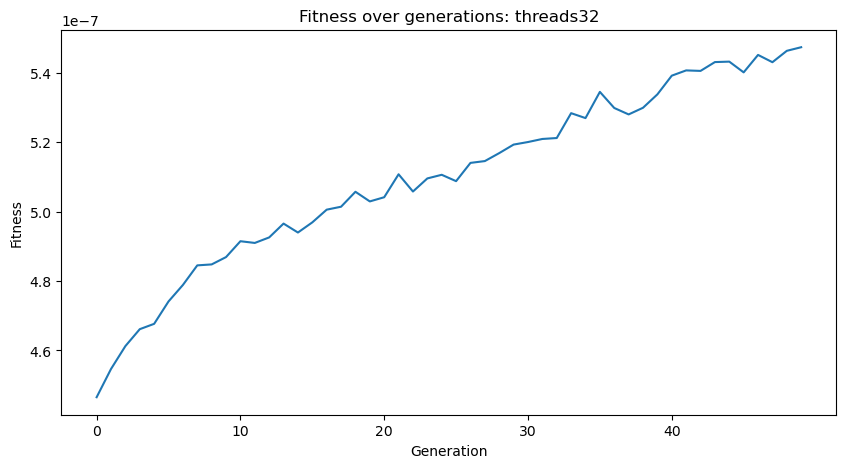

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(df_fitness.iloc[11, 1:])
plt.title('Fitness over generations: ' + df_fitness.iloc[11, 0])
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.xticks(ticks=np.arange(0, 50, 10), labels=np.arange(0, 50, 10))
plt.show()

Plot of fitness across generation for Threads (32 workers) strategy.

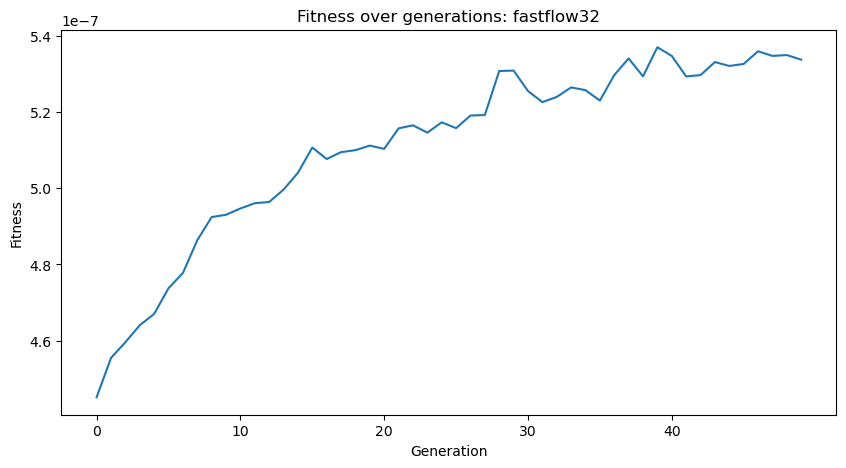

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(df_fitness.iloc[12, 1:])
plt.title('Fitness over generations: ' + df_fitness.iloc[12, 0])
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.xticks(ticks=np.arange(0, 50, 10), labels=np.arange(0, 50, 10))
plt.show()

# Sequential and parallelizable parts of the program

In [13]:
df_sequential = pd.read_csv('results/sequential_results.csv')
df_sequential.head()

,maxFitness,totalTime,distanceTime,initializationTimeRandom,initializationTimeEmpty,evolutionTime,crossoverTime,mutationTime,fitnessTime
0,5.393310e-07,59820995,6993,38036,1605,59742659,2355403,17,1167169
1,5.483080e-07,106964514,20461,92971,5172,106780184,5625751,7082,3398935


In [20]:
# Calulate the column "otherTime" in the dataframe (totalTime - distanceTime - initializationTimeRandom - initializationTimeEmpty - evolutionTime)
df_sequential['otherTime'] = df_sequential['totalTime'] - df_sequential['distanceTime'] - df_sequential['initializationTimeRandom'] - df_sequential['initializationTimeEmpty'] - df_sequential['evolutionTime']

Pieplot over the times

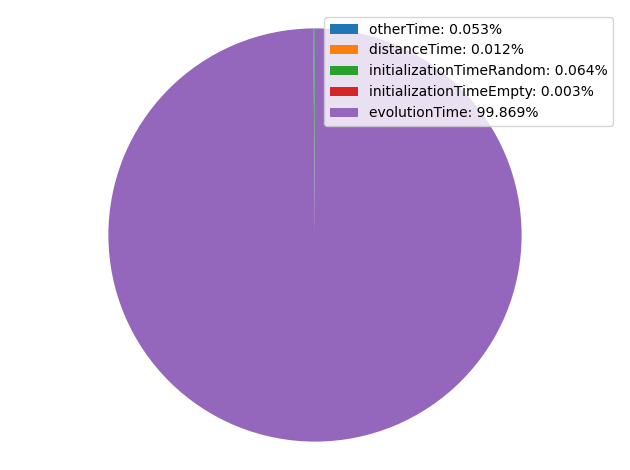

In [62]:
sizes = df_sequential[['otherTime', 'distanceTime', 'initializationTimeRandom', 'initializationTimeEmpty', 'evolutionTime']].iloc[0].values
# Normalize sizes in 0-100
sizes = sizes / sizes.sum() * 100
labels=['otherTime', 'adjacencyMatrixTime', 'initializationTimeRandom', 'initializationTimeEmpty', 'evolutionTime']

plt.pie(sizes, startangle=90)
handles, _ = plt.gca().get_legend_handles_labels()
legend_labels = [f'{label}: {size:.3f}%' for label, size in zip(labels, sizes)]
plt.legend(legend_labels, loc='best')

plt.axis('equal')
plt.tight_layout()
plt.show()

Exclude evolutionTime

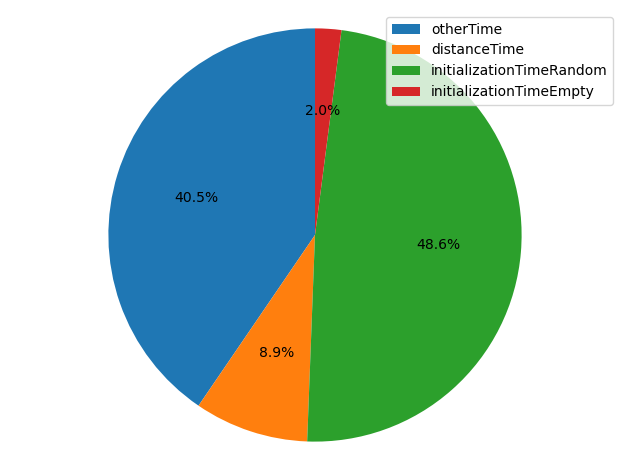

In [32]:
sizes = df_sequential[['otherTime', 'distanceTime', 'initializationTimeRandom', 'initializationTimeEmpty']].iloc[0].values

plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.legend(labels=['otherTime', 'adjacencyMatrixTime', 'initializationTimeRandom', 'initializationTimeEmpty'], loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

Internal times in evolutionTime

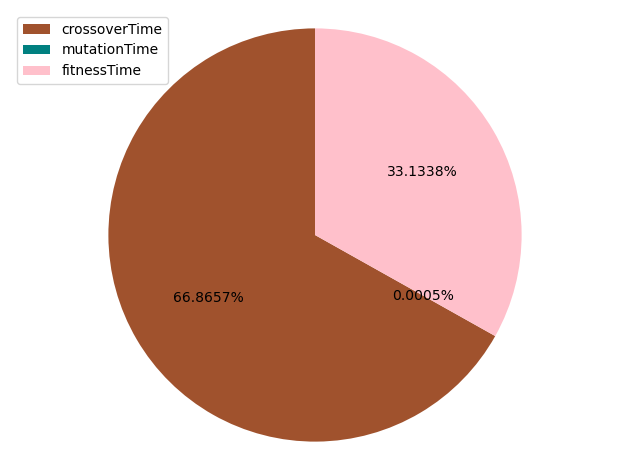

In [47]:
sizes = df_sequential[['crossoverTime', 'mutationTime', 'fitnessTime']].iloc[0].values

plt.pie(sizes, autopct='%1.4f%%', startangle=90, colors=['sienna', 'teal', 'pink'])
plt.legend(labels=['crossoverTime', 'mutationTime', 'fitnessTime'], loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

# Parallelization total time analysis

In [76]:
num_workers_list = [1,2,4,8,16,32,64]

In [64]:
df_threads = pd.read_csv('results/threads_results.csv')
df_threads.head()

,numWorkers,maxFitness,totalTime,distanceTime,initializationTimeRandom,initializationTimeEmpty,evolutionTime,crossoverTime,mutationTime,fitnessTime
0,1,5.454900e-07,20450713,9380,56648,3318,20347862,0,0,0
1,2,5.334700e-07,12249484,4867,97173,2169,12105053,0,0,0
2,4,5.436800e-07,9667698,2611,162307,1712,9442846,0,0,0
3,8,5.407090e-07,10328429,7583,311236,5904,9928488,0,0,0
4,16,5.447590e-07,13711953,4450,436940,5776,13098674,0,0,0


In [65]:
df_ff = pd.read_csv('results/ff_results.csv')
df_ff.head()

,numWorkers,maxFitness,totalTime,distanceTime,initializationTimeRandom,initializationTimeEmpty,evolutionTime,crossoverTime,mutationTime,fitnessTime
0,1,5.422160e-07,59462800,32858,72397,24985,59277106,0,0,0
1,2,5.453650e-07,18422286,33591,144243,24836,18164474,0,0,0
2,4,5.441270e-07,10981283,45286,219527,31246,10610449,0,0,0
3,8,5.477960e-07,12285120,58294,395706,32570,11697958,0,0,0
4,16,5.410200e-07,10932459,58280,419884,37319,10302807,0,0,0


In [67]:
total_times_threads = df_threads['totalTime'].iloc[0:7]
total_times_ff = df_ff['totalTime'].iloc[0:7]

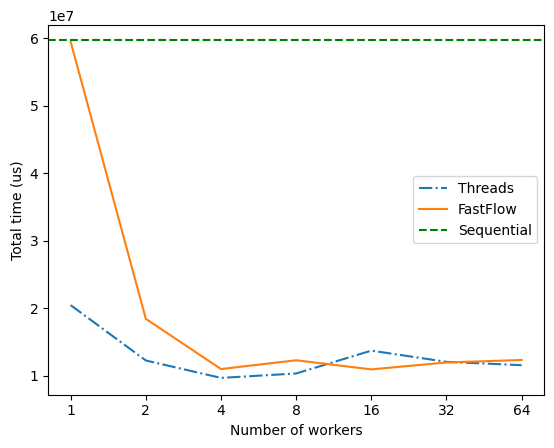

In [91]:
plt.plot(total_times_threads, label='Threads', linestyle='dashdot')
plt.plot(total_times_ff, label='FastFlow')
# plot an horizontal line with the sequential time
plt.axhline(y=df_sequential['totalTime'].iloc[0], color='green', label='Sequential', linestyle='dashed')
plt.legend()
plt.xlabel('Number of workers')
plt.ylabel('Total time (us)')
plt.xticks(ticks=[i for i in range(len(num_workers_list))], labels=num_workers_list)

plt.show()

### Speedup

In [88]:
df_threads['speedup'] = df_sequential['totalTime'].iloc[0] / df_threads['totalTime']
df_ff['speedup'] = df_sequential['totalTime'].iloc[0] / df_ff['totalTime']

In [89]:
ideal_times = [df_sequential['totalTime'].iloc[0]/i for i in num_workers_list]

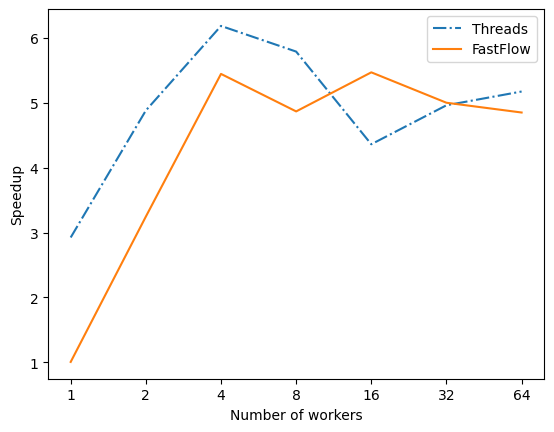

In [96]:
plt.plot(df_threads['speedup'].iloc[0:7], label='Threads', linestyle='dashdot')
plt.plot(df_ff['speedup'].iloc[0:7], label='FastFlow')
#plt.plot(ideal_times, linestyle='dashed', label='Ideal speedup')
plt.legend()
plt.xlabel('Number of workers')
plt.ylabel('Speedup')
plt.xticks(ticks=[i for i in range(len(num_workers_list))], labels=num_workers_list)

plt.show()